In [154]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [155]:
df = pd.read_csv("Main_task.csv")

In [156]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


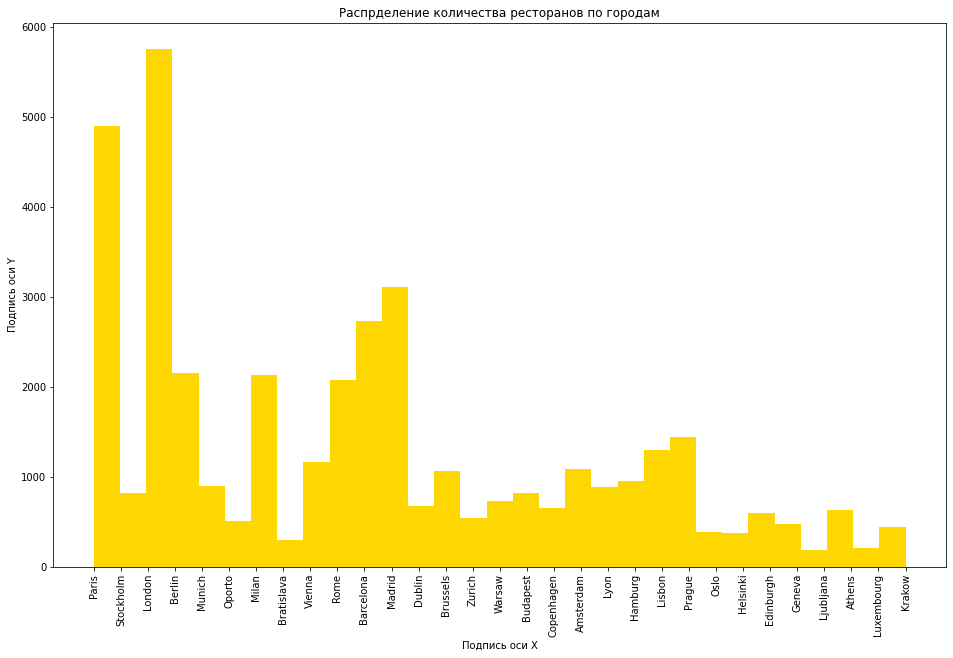

In [170]:
plt.figure(figsize=(16,10))
df.City.hist(bins=df.City.nunique(), color='gold')
plt.grid(False)
plt.xticks(rotation=90)
plt.xlabel('Подпись оси Х')
plt.ylabel('Подпись оси Y')
plt.title('Распрделение количества ресторанов по городам');

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [172]:
df = df.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1) 

In [173]:
df['Number of Reviews'].fillna(df['Number of Reviews'].median(), inplace=True)

In [174]:
df['Cuisine Style'].fillna("['Only_one']", inplace=True)

In [175]:
df.loc[df['Price Range'] == '$', 'money'] = 1
df.loc[df['Price Range'] == '$$ - $$$', 'money'] = 2
df.loc[df['Price Range'] == '$$$$', 'money'] = 3
df.drop('Price Range', axis=1, inplace=True)

In [176]:
df.money.fillna(df.money.median(), inplace=True)

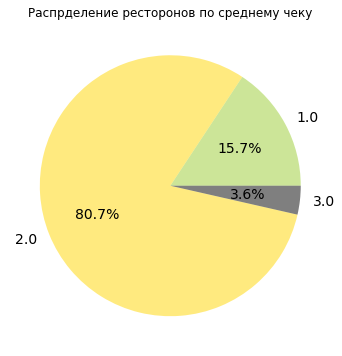

In [180]:
d = df.groupby(['money'])['Ranking'].count()
d.plot.pie(figsize=(12, 6), autopct='%1.1f%%',
           colors = ['yellowgreen', 'gold', 'black'],
           wedgeprops={'alpha':0.5},
           fontsize=14,
           title='Распрделение ресторонов по среднему чеку')
plt.ylabel('');

In [113]:
cities = pd.get_dummies(df.City)
df = pd.concat([df, cities], axis=1)

In [114]:
df.drop('City', axis=1, inplace=True)

In [115]:
def count_cuisines(row):
    cs = row['Cuisine Style']
    answer = cs.count(',') + 1
    return answer

In [116]:
df['cs_couter'] = df.apply(count_cuisines, axis=1)

In [117]:
df.drop('Cuisine Style', axis=1, inplace=True)

In [118]:
def get_first_date(row):
    dates = row['Reviews'].split('], ')[1][:-1].replace('[', '').replace(']', '')
    try:
        first = dates.split(', ')[0][1:-1]
        first = datetime.strptime(first, '%m/%d/%Y')
        diff = datetime.now() - first
        return diff.days
    except:
        return np.NaN

In [119]:
df['fresh_review'] = df.apply(get_first_date, axis=1)

In [120]:
df.fresh_review.fillna(df.fresh_review.median(), inplace=True)

In [121]:
df.drop('Reviews', axis=1, inplace=True)

In [122]:
df

,Ranking,Rating,Number of Reviews,money,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,cs_couter,fresh_review
0,5570.0,3.5,194.0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,1143.0
1,1537.0,4.0,10.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1321.0
2,353.0,4.5,688.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,1135.0
3,3458.0,5.0,3.0,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1253.0
4,621.0,4.0,84.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,79.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1158.0
39996,6341.0,3.5,542.0,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,5,1153.0
39997,1652.0,4.5,4.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1566.0
39998,641.0,4.0,70.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,5,1316.0


In [123]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = df.drop(['Rating'], axis = 1)  
y = df['Rating']  
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# где random state, кураторы?
    

In [124]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  

MAE: 0.2136815


In [126]:
df2 = pd.read_csv("kaggle_task.csv")

In [127]:
df2

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354
...,...,...,...,...,...,...,...,...,...
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
9997,id_9997,Milan,NaN,5562.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
9998,id_9998,Milan,['Italian'],4010.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815


In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            10000 non-null  float64
 1   Number of Reviews  10000 non-null  float64
 2   money              10000 non-null  float64
 3   Amsterdam          10000 non-null  uint8  
 4   Athens             10000 non-null  uint8  
 5   Barcelona          10000 non-null  uint8  
 6   Berlin             10000 non-null  uint8  
 7   Bratislava         10000 non-null  uint8  
 8   Brussels           10000 non-null  uint8  
 9   Budapest           10000 non-null  uint8  
 10  Copenhagen         10000 non-null  uint8  
 11  Dublin             10000 non-null  uint8  
 12  Edinburgh          10000 non-null  uint8  
 13  Geneva             10000 non-null  uint8  
 14  Hamburg            10000 non-null  uint8  
 15  Helsinki           10000 non-null  uint8  
 16  Krakow             1000

In [129]:
df2 = df2.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1) 

In [130]:
df2['Number of Reviews'].fillna(df2['Number of Reviews'].median(), inplace=True)

In [131]:
df2['Cuisine Style'].fillna("['Only_one']", inplace=True)

In [132]:
df2.loc[df2['Price Range'] == '$', 'money'] = 1
df2.loc[df2['Price Range'] == '$$ - $$$', 'money'] = 2
df2.loc[df2['Price Range'] == '$$$$', 'money'] = 3
df2.drop('Price Range', axis=1, inplace=True)

In [133]:
df2.money.fillna(df2.money.median(), inplace=True)

In [134]:
cities = pd.get_dummies(df2.City)
df2 = pd.concat([df2, cities], axis=1)

In [135]:
df2.drop('City', axis=1, inplace=True)

In [136]:
df2['cs_couter'] = df2.apply(count_cuisines, axis=1)

In [137]:
df2.drop('Cuisine Style', axis=1, inplace=True)

In [138]:
df2['Reviews'].fillna('[[], []]', inplace=True)

In [139]:
df2['fresh_review'] = df2.apply(get_first_date, axis=1)

In [145]:
df2.fresh_review.fillna(df.fresh_review.median(), inplace=True)

In [141]:
df2.drop('Reviews', axis=1, inplace=True)

In [142]:
X_train = df.drop(['Rating'], axis = 1)  
y_train = df['Rating']
X_test = df2

In [147]:
# Создаём модель  
regr2 = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr2.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred2 = regr.predict(X_test)  

In [148]:
yl = list(y_pred)
my = [] # last
for i in range(len(yl)):
    my.append({'id': f'id_{i}', 'Rating': yl[i]})

In [149]:
kaggle = pd.DataFrame(my) # last
kaggle = kaggle.set_index('id')
kaggle.to_csv('final.csv')